<h1 style="color: #2E86C1;">Movie Revenue Prediction Using TMDb Dataset</h1>

<p style="font-size: 16px; color: #555;">
  In this project, we aim to predict movie revenues using data from <strong>The Movie Database (TMDb)</strong>. We will perform data preprocessing, exploratory data analysis (EDA), feature engineering, and build regression models to predict the revenue of movies based on various features.
</p>

<h2 style="color: #27AE60;">Table of Contents</h2>
<ol style="font-size: 16px;">
  <li><a href="#importing-libraries" style="color: #2980B9;">Importing Libraries</a></li>
  <li><a href="#data-loading" style="color: #2980B9;">Data Loading</a></li>
  <li><a href="#data-preprocessing" style="color: #2980B9;">Data Preprocessing</a></li>
  <li><a href="#exploratory-data-analysis-eda" style="color: #2980B9;">Exploratory Data Analysis (EDA)</a></li>
  <li><a href="#feature-engineering" style="color: #2980B9;">Feature Engineering</a></li>
  <li><a href="#model-building" style="color: #2980B9;">Model Building</a></li>
  <li><a href="#model-evaluation" style="color: #2980B9;">Model Evaluation</a></li>
  <li><a href="#conclusion" style="color: #2980B9;">Conclusion</a></li>
</ol>


In [2]:
import requests
import pandas as pd
import time

# Function to fetch book data by ISBN
def fetch_book_data(isbn_list):
    base_url = 'https://openlibrary.org/api/books'
    book_data = []

    for isbn in isbn_list:
        params = {
            'bibkeys': f'ISBN:{isbn}',
            'format': 'json',
            'jscmd': 'data'
        }
        response = requests.get(base_url, params=params)
        if response.status_code != 200:
            print(f'Failed to retrieve data for ISBN {isbn}')
            continue

        data = response.json()
        key = f'ISBN:{isbn}'
        if key in data:
            book_info = data[key]
            book_entry = {
                'title': book_info.get('title', None),
                'subtitle': book_info.get('subtitle', None),
                'authors': ', '.join([author['name'] for author in book_info.get('authors', [])]),
                'publish_date': book_info.get('publish_date', None),
                'number_of_pages': book_info.get('number_of_pages', None),
                'publishers': ', '.join([publisher['name'] for publisher in book_info.get('publishers', [])]),
                'subjects': ', '.join([subject['name'] for subject in book_info.get('subjects', [])]),
                'identifiers': book_info.get('identifiers', {}).get('isbn_10', []),
                'cover': book_info.get('cover', {}).get('large', None),
                'url': book_info.get('url', None),
                'excerpts': book_info.get('excerpts', [{}])[0].get('text', None)
            }
            book_data.append(book_entry)
        else:
            print(f'No data found for ISBN {isbn}')
        # Sleep to respect API rate limits
        time.sleep(0.1)
    return book_data

# Generate a list of ISBN numbers (For example purposes, using a range)
isbn_start = 9780000000000
isbn_list = [str(isbn_start + i) for i in range(5000)]  # Generate 5000 ISBNs

# Fetch book data
book_data = fetch_book_data(isbn_list)

# Convert to DataFrame
df = pd.DataFrame(book_data)

# Drop duplicates and rows with missing titles
df.drop_duplicates(subset='title', inplace=True)
df.dropna(subset=['title'], inplace=True)

# Display the DataFrame
print(df.head())

# Save the DataFrame to a CSV file
df.to_csv('openlibrary_books.csv', index=False)


No data found for ISBN 9780000000001
No data found for ISBN 9780000000003
No data found for ISBN 9780000000004
No data found for ISBN 9780000000005
No data found for ISBN 9780000000006
No data found for ISBN 9780000000007
No data found for ISBN 9780000000008
No data found for ISBN 9780000000009
No data found for ISBN 9780000000010
No data found for ISBN 9780000000011
No data found for ISBN 9780000000012
No data found for ISBN 9780000000013
No data found for ISBN 9780000000014
No data found for ISBN 9780000000015
No data found for ISBN 9780000000016
No data found for ISBN 9780000000017
No data found for ISBN 9780000000018
No data found for ISBN 9780000000020
No data found for ISBN 9780000000021
No data found for ISBN 9780000000022
No data found for ISBN 9780000000023
No data found for ISBN 9780000000024
No data found for ISBN 9780000000025
No data found for ISBN 9780000000027
No data found for ISBN 9780000000028
No data found for ISBN 9780000000029
No data found for ISBN 9780000000030
N


KeyboardInterrupt



In [5]:
import requests
import pandas as pd
import time

api_key = '7fbe3f4e6859d907a0f3a0139e6eaf7b'  # Replace with your actual API key
base_url = 'https://api.themoviedb.org/3'

params = {
    'api_key': api_key,
    'language': 'en-US',
    'sort_by': 'popularity.desc',
    'include_adult': 'false',
    'include_video': 'false',
    'page': 1
}

movies_list = []
total_pages = 1
max_movies = 5000
movies_collected = 0

while movies_collected < max_movies and params['page'] <= total_pages:
    try:
        response = requests.get(f"{base_url}/discover/movie", params=params, timeout=10)
        response.raise_for_status()
    except requests.exceptions.RequestException as e:
        print(f"An error occurred while fetching page {params['page']}: {e}")
        break

    data = response.json()
    total_pages = data.get('total_pages', 1)
    movies = data.get('results', [])

    for movie in movies:
        movie_id = movie.get('id')
        try:
            movie_details_response = requests.get(
                f"{base_url}/movie/{movie_id}",
                params={'api_key': api_key, 'language': 'en-US'},
                timeout=10
            )
            movie_details_response.raise_for_status()
        except requests.exceptions.RequestException as e:
            print(f"Error fetching details for movie ID {movie_id}: {e}")
            continue

        movie_details = movie_details_response.json()
        # Extract and append movie details as before
        movies_list.append({
            'id': movie_details.get('id'),
            'title': movie_details.get('title'),
            # ... include other fields
        })
        movies_collected += 1
        if movies_collected >= max_movies:
            break

    print(f"Page {params['page']} processed. Total movies collected: {movies_collected}")
    params['page'] += 1
    time.sleep(0.2)

# Proceed with saving the DataFrame as before


Page 1 processed. Total movies collected: 20
Page 2 processed. Total movies collected: 40
Page 3 processed. Total movies collected: 60
Page 4 processed. Total movies collected: 80
Page 5 processed. Total movies collected: 100
Page 6 processed. Total movies collected: 120
Page 7 processed. Total movies collected: 140
Page 8 processed. Total movies collected: 160
Page 9 processed. Total movies collected: 180
Page 10 processed. Total movies collected: 200
Page 11 processed. Total movies collected: 220
Page 12 processed. Total movies collected: 240
Page 13 processed. Total movies collected: 260
Page 14 processed. Total movies collected: 280
Page 15 processed. Total movies collected: 300
Page 16 processed. Total movies collected: 320
Page 17 processed. Total movies collected: 340
Page 18 processed. Total movies collected: 360
Page 19 processed. Total movies collected: 380
Page 20 processed. Total movies collected: 400
Page 21 processed. Total movies collected: 420
Page 22 processed. Total m

In [1]:
import requests
import pandas as pd
import time


df = pd.read_csv("tmdb_movies.csv")
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      5000 non-null   int64 
 1   title   5000 non-null   object
dtypes: int64(1), object(1)
memory usage: 78.2+ KB
None


In [1]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


## Import Libraries 

In [2]:
import pandas as pd
import numpy as np
import ast
import re
import nltk
import warnings

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Machine Learning libraries
from sklearn.preprocessing import MultiLabelBinarizer, LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

# NLTK resources
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

# Suppress warnings
warnings.filterwarnings('ignore')

# Download NLTK stopwords
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\alixa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

# Download NLTK stopwords
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\alixa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Data Loading

In [4]:
# Load datasets
movies_df = pd.read_csv('tmdb_5000_movies.csv')
credits_df = pd.read_csv('tmdb_5000_credits.csv')

# Rename 'movie_id' to 'id' in credits_df to match movies_df
credits_df.rename(columns={'movie_id': 'id'}, inplace=True)

# Merge datasets on 'id'
df = movies_df.merge(credits_df, on='id')

# Check the shape and columns
print(f"Dataset shape: {df.shape}")
print(f"Dataset columns:\n{df.columns}")


Dataset shape: (4803, 23)
Dataset columns:
Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title_x', 'vote_average',
       'vote_count', 'title_y', 'cast', 'crew'],
      dtype='object')


In [5]:
print(df.info())

print(df.head(1))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

### Data Preprocessing

1. Handle missing values

In [6]:
# Check for missing values
print(df.isnull().sum())

# Drop rows with missing 'title' or 'overview'
df.dropna(subset=['title_x', 'overview'], inplace=True)

# Fill missing 'runtime' with median
df['runtime'].fillna(df['runtime'].median(), inplace=True)


budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title_x                    0
vote_average               0
vote_count                 0
title_y                    0
cast                       0
crew                       0
dtype: int64


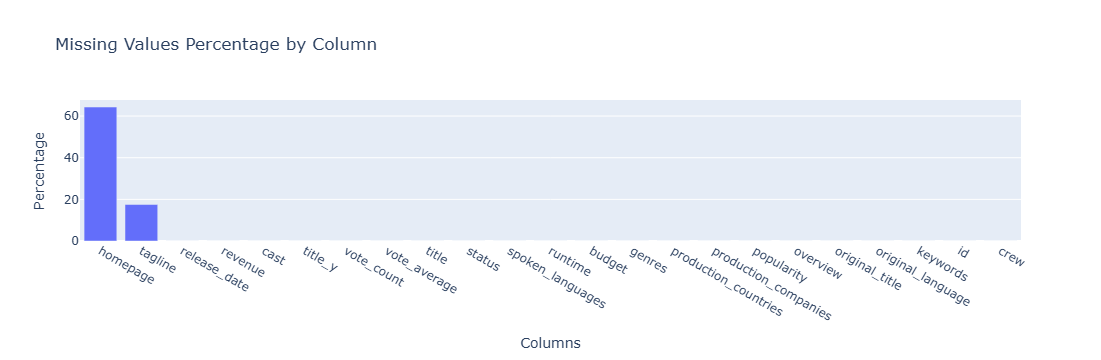

In [7]:
# Drop rows with missing 'title_x' or 'overview'
df.dropna(subset=['title_x', 'overview'], inplace=True)

# Rename 'title_x' to 'title' for clarity
df.rename(columns={'title_x': 'title'}, inplace=True)

# Visualize missing values
missing_values = df.isnull().sum().reset_index()
missing_values.columns = ['Column', 'MissingCount']
missing_values['MissingPercentage'] = (missing_values['MissingCount'] / df.shape[0]) * 100

# Plot missing values
fig = px.bar(missing_values.sort_values(by='MissingPercentage', ascending=False),
             x='Column', y='MissingPercentage',
             title='Missing Values Percentage by Column')
fig.update_layout(xaxis_title='Columns', yaxis_title='Percentage')
fig.show()


2. converting data typpes

In [8]:
# Convert 'release_date' to datetime
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')

# Fill missing 'release_date' with default date
df['release_date'].fillna(pd.Timestamp('1970-01-01'), inplace=True)

# Convert 'budget' and 'revenue' to numeric
df['budget'] = pd.to_numeric(df['budget'], errors='coerce')
df['revenue'] = pd.to_numeric(df['revenue'], errors='coerce')


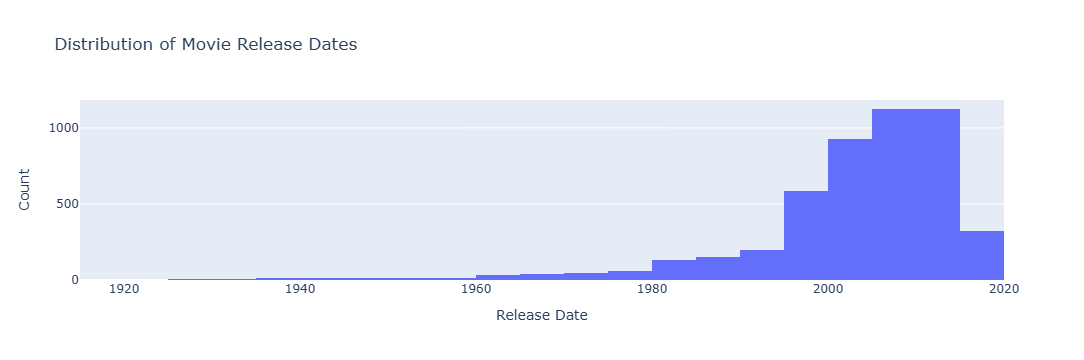

In [9]:
# Convert 'release_date' to datetime
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')

# Fill missing 'release_date' with default date
df['release_date'] = df['release_date'].fillna(pd.Timestamp('1970-01-01'))

# Convert 'budget' and 'revenue' to numeric
df['budget'] = pd.to_numeric(df['budget'], errors='coerce')
df['revenue'] = pd.to_numeric(df['revenue'], errors='coerce')

# Visualize release dates
fig = px.histogram(df, x='release_date', nbins=50, title='Distribution of Movie Release Dates')
fig.update_layout(xaxis_title='Release Date', yaxis_title='Count')
fig.show()


3. parsing json fields

In [10]:
# Function to extract names from JSON-formatted strings
def extract_names(x):
    try:
        return [i['name'] for i in ast.literal_eval(x)]
    except:
        return []

# Apply function to relevant columns
df['genres'] = df['genres'].apply(extract_names)
df['keywords'] = df['keywords'].apply(extract_names)
df['production_companies'] = df['production_companies'].apply(extract_names)
df['production_countries'] = df['production_countries'].apply(extract_names)
df['spoken_languages'] = df['spoken_languages'].apply(extract_names)
df['cast'] = df['cast'].apply(extract_names)


In [11]:
# Function to extract names from JSON-formatted strings
def extract_names(x):
    try:
        return [i['name'] for i in ast.literal_eval(x)]
    except:
        return []

# Apply function to relevant columns
json_columns = ['genres', 'keywords', 'production_companies', 'production_countries', 'spoken_languages', 'cast']
for column in json_columns:
    df[column] = df[column].apply(extract_names)


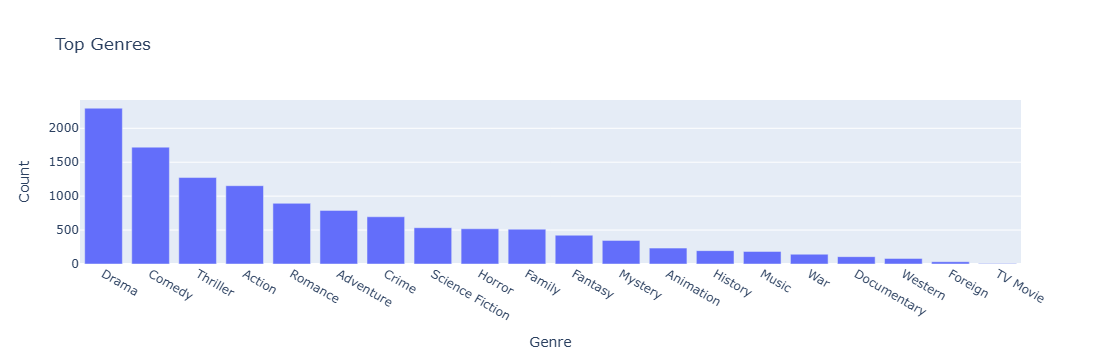

In [6]:

# Visualize top genres
from collections import Counter

genre_list = sum(df['genres'], [])
genre_counts = Counter(genre_list)
genre_counts_df = pd.DataFrame(genre_counts.items(), columns=['Genre', 'Count']).sort_values(by='Count', ascending=False)

fig = px.bar(genre_counts_df, x='Genre', y='Count', title='Top Genres')
fig.update_layout(xaxis_title='Genre', yaxis_title='Count')
fig.show()


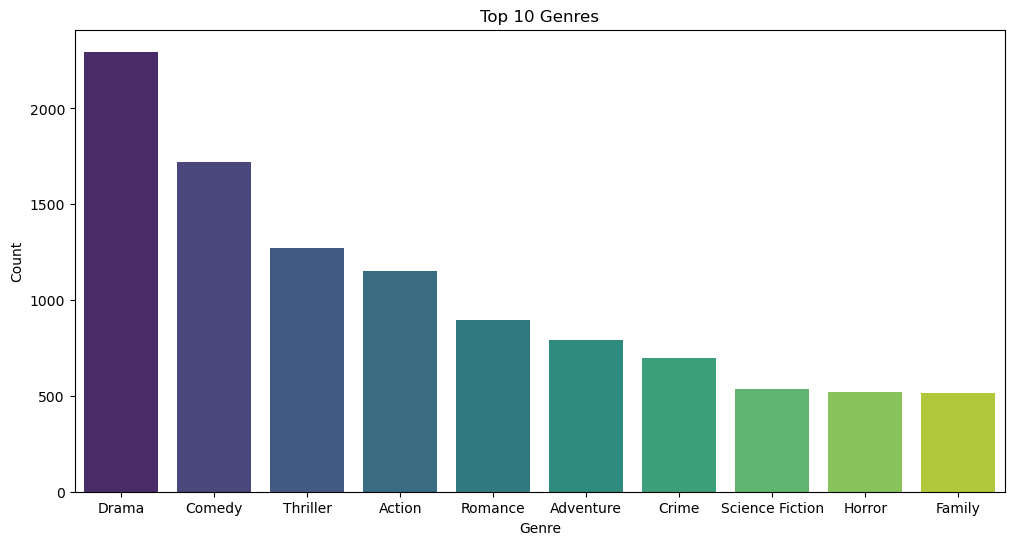

In [18]:
from collections import Counter

genre_list = sum(df['genres'], [])
genre_counts = Counter(genre_list)
genre_counts_df = pd.DataFrame(genre_counts.items(), columns=['Genre', 'Count']).sort_values(by='Count', ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x='Genre', y='Count', data=genre_counts_df.head(10), palette='viridis')
plt.title('Top 10 Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()


4. extracting director information

In [12]:
# Function to get director name from crew
def get_director(crew_str):
    try:
        crew_list = ast.literal_eval(crew_str)
        for member in crew_list:
            if member['job'] == 'Director':
                return member['name']
    except:
        return np.nan

# Apply function to get director
df['director'] = df['crew'].apply(get_director)


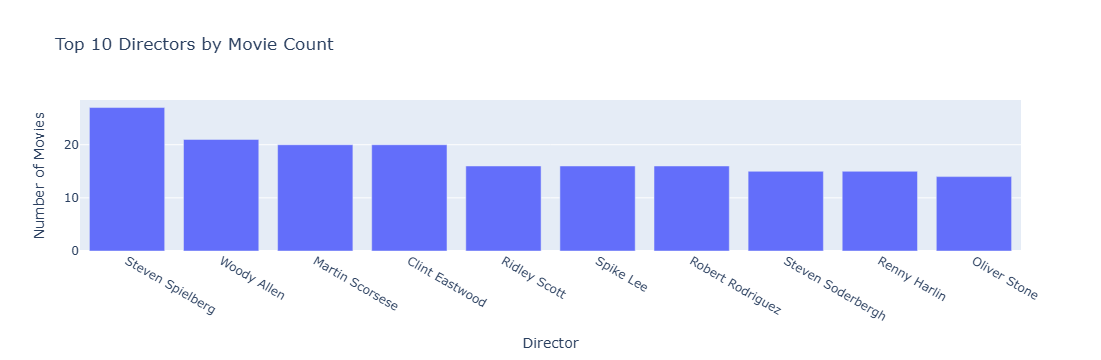

In [13]:
# Function to get director name from crew
def get_director(crew_str):
    try:
        crew_list = ast.literal_eval(crew_str)
        for member in crew_list:
            if member['job'] == 'Director':
                return member['name']
    except:
        return np.nan

# Apply function to get director
df['director'] = df['crew'].apply(get_director)

# Visualize top directors
director_counts = df['director'].value_counts().reset_index()
director_counts.columns = ['Director', 'Movie Count']
top_directors = director_counts.head(10)

fig = px.bar(top_directors, x='Director', y='Movie Count', title='Top 10 Directors by Movie Count')
fig.update_layout(xaxis_title='Director', yaxis_title='Number of Movies')
fig.show()


### EDA

1. Statistical Summary

In [12]:
# Statistical summary
print(df.describe())

             budget             id   popularity  \
count  4.800000e+03    4800.000000  4800.000000   
mean   2.905988e+07   56967.252917    21.505403   
min    0.000000e+00       5.000000     0.000000   
25%    7.950000e+05    9012.750000     4.682212   
50%    1.500000e+07   14623.500000    12.928897   
75%    4.000000e+07   58512.500000    28.350628   
max    3.800000e+08  447027.000000   875.581305   
std    4.073043e+07   88350.548128    31.822273   

                        release_date       revenue      runtime  vote_average  \
count                           4800  4.800000e+03  4800.000000   4800.000000   
mean   2002-12-22 15:33:36.000000128  8.231205e+07   106.880833      6.092917   
min              1916-09-04 00:00:00  0.000000e+00     0.000000      0.000000   
25%              1999-07-07 06:00:00  0.000000e+00    94.000000      5.600000   
50%              2005-09-30 00:00:00  1.918199e+07   103.000000      6.200000   
75%              2011-02-14 00:00:00  9.293886e+07   1

             budget       revenue   popularity  vote_average    vote_count  \
count  4.800000e+03  4.800000e+03  4800.000000   4800.000000   4800.000000   
mean   2.905988e+07  8.231205e+07    21.505403      6.092917    690.645208   
std    4.073043e+07  1.628950e+08    31.822273      1.191468   1234.853376   
min    0.000000e+00  0.000000e+00     0.000000      0.000000      0.000000   
25%    7.950000e+05  0.000000e+00     4.682212      5.600000     54.000000   
50%    1.500000e+07  1.918199e+07    12.928897      6.200000    236.000000   
75%    4.000000e+07  9.293886e+07    28.350628      6.800000    737.250000   
max    3.800000e+08  2.787965e+09   875.581305     10.000000  13752.000000   

           runtime  
count  4800.000000  
mean    106.880833  
std      22.611663  
min       0.000000  
25%      94.000000  
50%     103.000000  
75%     118.000000  
max     338.000000  


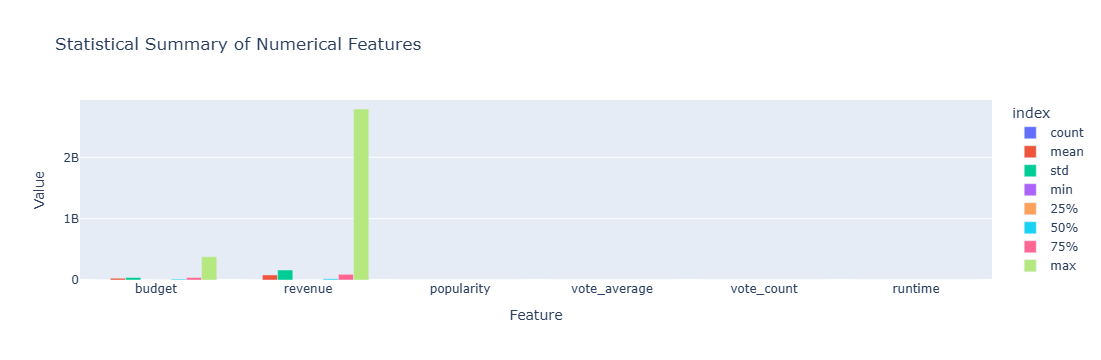

In [14]:
# Statistical summary
summary_stats = df[['budget', 'revenue', 'popularity', 'vote_average', 'vote_count', 'runtime']].describe()
print(summary_stats)

# Visualize statistical summary
summary_stats_melted = summary_stats.reset_index().melt(id_vars='index')
fig = px.bar(summary_stats_melted, x='variable', y='value', color='index', barmode='group',
             title='Statistical Summary of Numerical Features')
fig.update_layout(xaxis_title='Feature', yaxis_title='Value')
fig.show()


2. correlation matrix

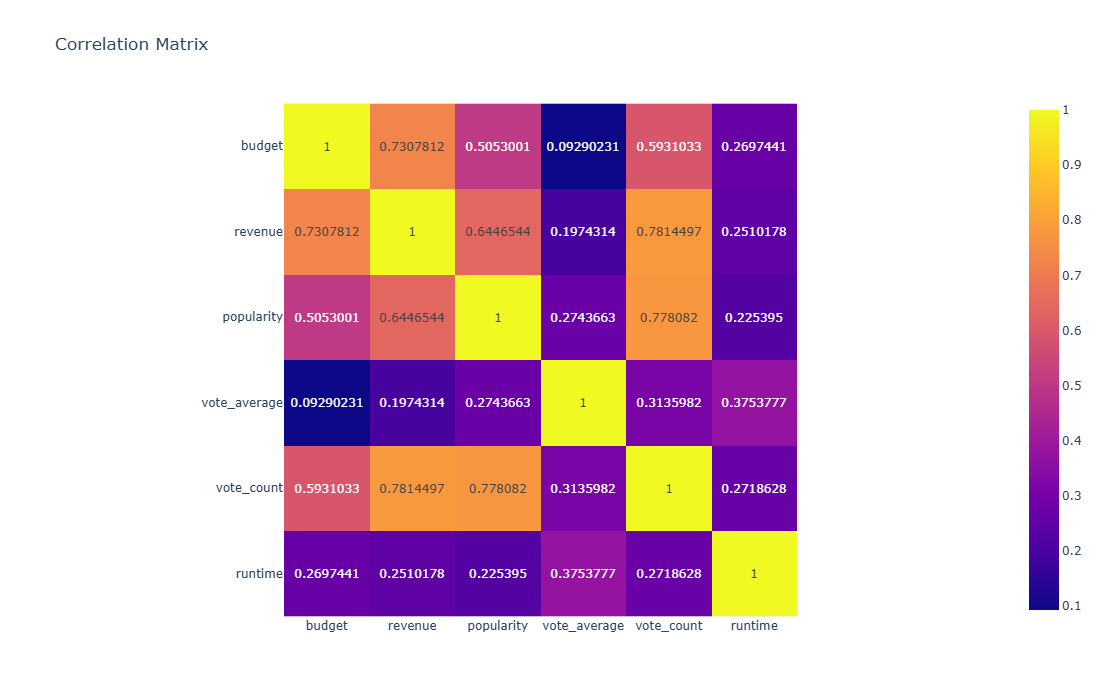

In [15]:
# Compute correlation matrix
corr_matrix = df[['budget', 'revenue', 'popularity', 'vote_average', 'vote_count', 'runtime']].corr()

# Plot heatmap using Plotly
fig = px.imshow(corr_matrix, text_auto=True, title='Correlation Matrix')
fig.update_layout(width=700, height=700)
fig.show()


3. Distribution of revenue

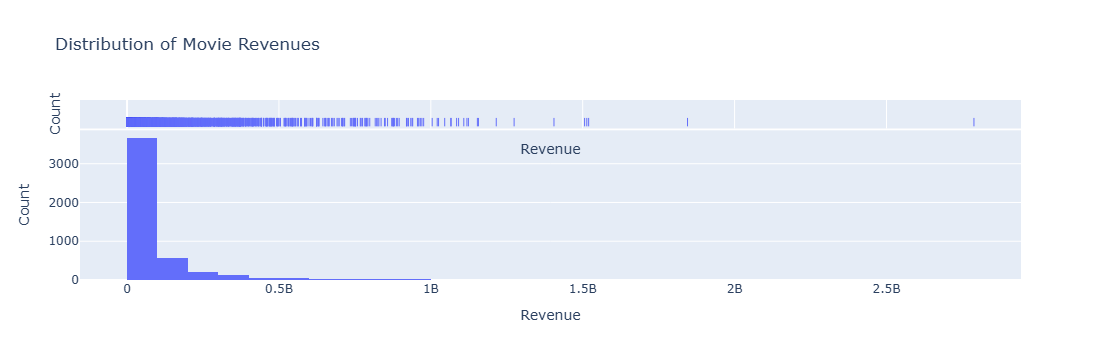

In [16]:
import plotly.express as px

# Assuming df is your DataFrame containing the 'revenue' column
fig = px.histogram(df, x='revenue', nbins=50, title='Distribution of Movie Revenues', marginal='rug')
fig.update_xaxes(title='Revenue')
fig.update_yaxes(title='Count')
fig.show()

4. Budget v/s Revenue

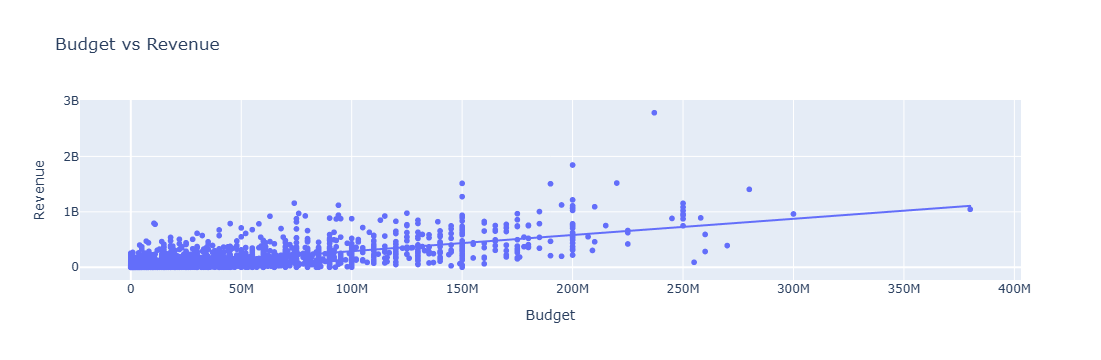

In [17]:
import plotly.express as px

# Create the scatter plot
fig = px.scatter(
    df,                     
    x='budget',             
    y='revenue',            
    title='Budget vs Revenue', 
    labels={'budget': 'Budget', 'revenue': 'Revenue'},
    trendline='ols'         
)

# Update x-axis title for clarity
fig.update_xaxes(title='Budget')  # Label for the x-axis

# Update y-axis title for clarity
fig.update_yaxes(title='Revenue')  # Label for the y-axis

# Show the interactive plot
fig.show()

1. Encoding Genres

In [18]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
genres_encoded = pd.DataFrame(mlb.fit_transform(df['genres']), columns=mlb.classes_, index=df.index)

# Concatenate with the main DataFrame
df = pd.concat([df, genres_encoded], axis=1)


In [19]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
genres_encoded = pd.DataFrame(mlb.fit_transform(df['genres']), columns=mlb.classes_, index=df.index)

# Concatenate with the main DataFrame
df = pd.concat([df, genres_encoded], axis=1)

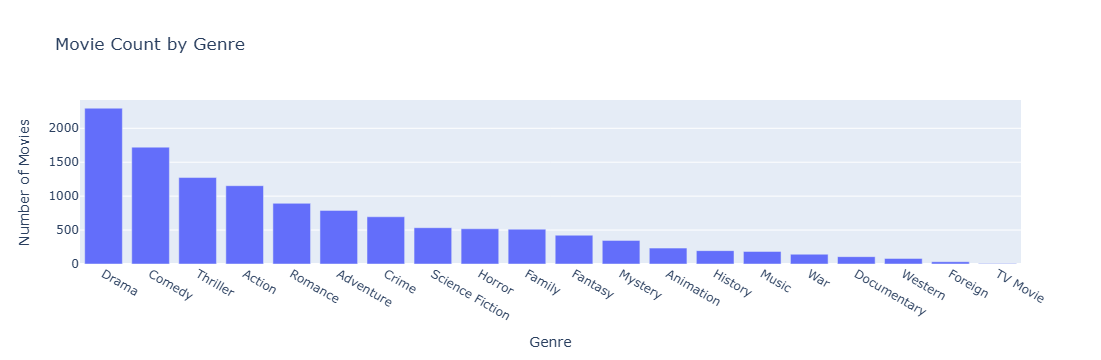

In [13]:


# Visualize genre distribution
genre_sums = genres_encoded.sum().reset_index()
genre_sums.columns = ['Genre', 'Count']
genre_sums = genre_sums.sort_values(by='Count', ascending=False)

fig = px.bar(genre_sums, x='Genre', y='Count', title='Movie Count by Genre')
fig.update_layout(xaxis_title='Genre', yaxis_title='Number of Movies')
fig.show()


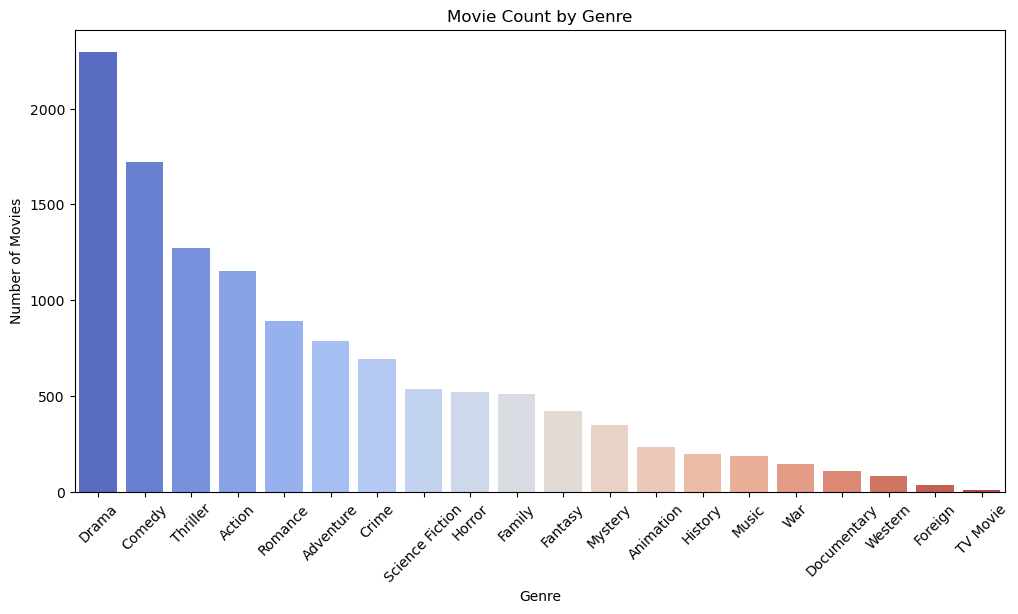

In [24]:
genre_sums = genres_encoded.sum().sort_values(ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x=genre_sums.index, y=genre_sums.values, palette='coolwarm')
plt.title('Movie Count by Genre')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.show()


2. Encoding original Language

In [20]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['original_language_encoded'] = le.fit_transform(df['original_language'])


In [21]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['original_language_encoded'] = le.fit_transform(df['original_language'])

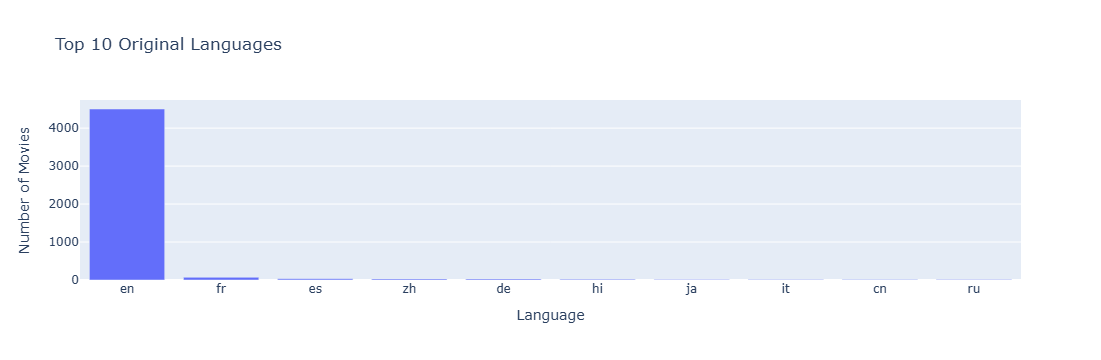

In [22]:


# Visualize language distribution
language_counts = df['original_language'].value_counts().reset_index()
language_counts.columns = ['Language', 'Count']
top_languages = language_counts.head(10)

fig = px.bar(top_languages, x='Language', y='Count', title='Top 10 Original Languages')
fig.update_layout(xaxis_title='Language', yaxis_title='Number of Movies')
fig.show()


3. Calculating profit

In [18]:
# Compute profit
df['profit'] = df['revenue'] - df['budget']


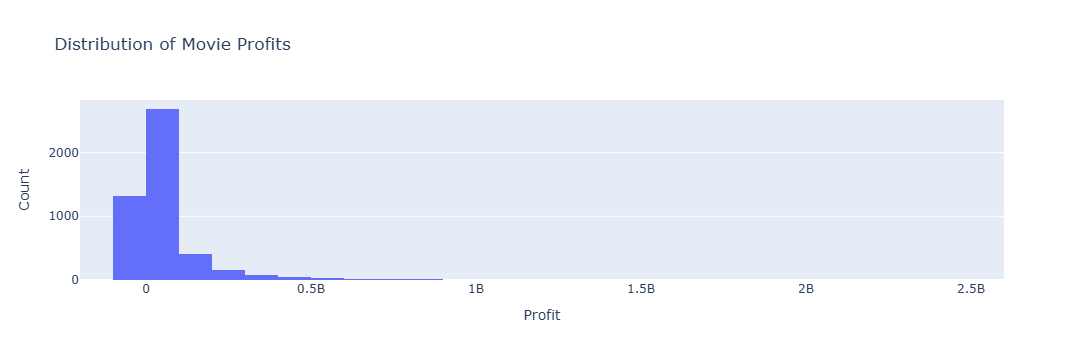

In [15]:
# Compute profit
df['profit'] = df['revenue'] - df['budget']

# Visualize profit distribution
fig = px.histogram(df, x='profit', nbins=50, title='Distribution of Movie Profits')
fig.update_layout(xaxis_title='Profit', yaxis_title='Count')
fig.show()


In [23]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re

### Preprocessing Text Data

In [24]:
ps = PorterStemmer()
stop_words = set(stopwords.words('english'))

# Function to preprocess text
def preprocess_text(text):
    if pd.isnull(text):
        return ''
    text = re.sub('[^a-zA-Z]', ' ', text)
    text = text.lower().split()
    text = [ps.stem(word) for word in text if word not in stop_words]
    return ' '.join(text)

df['overview_clean'] = df['overview'].apply(preprocess_text)


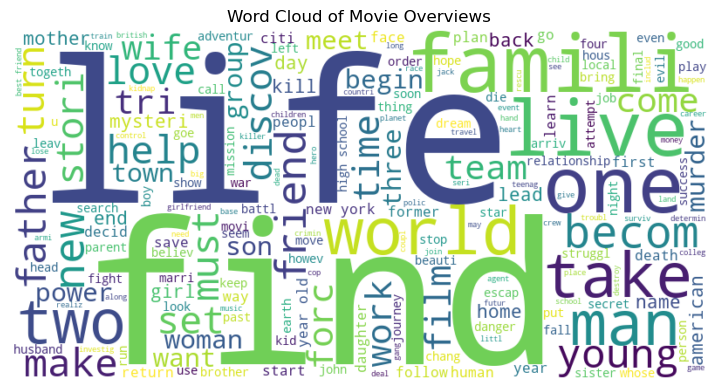

In [28]:
from wordcloud import WordCloud

text_data = ' '.join(df['overview_clean'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

plt.figure(figsize=(9,7.5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Movie Overviews')
plt.show()


### Scaling Numerical Features

In [29]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[['budget_scaled', 'popularity_scaled', 'runtime_scaled']] = scaler.fit_transform(df[['budget', 'popularity', 'runtime']])


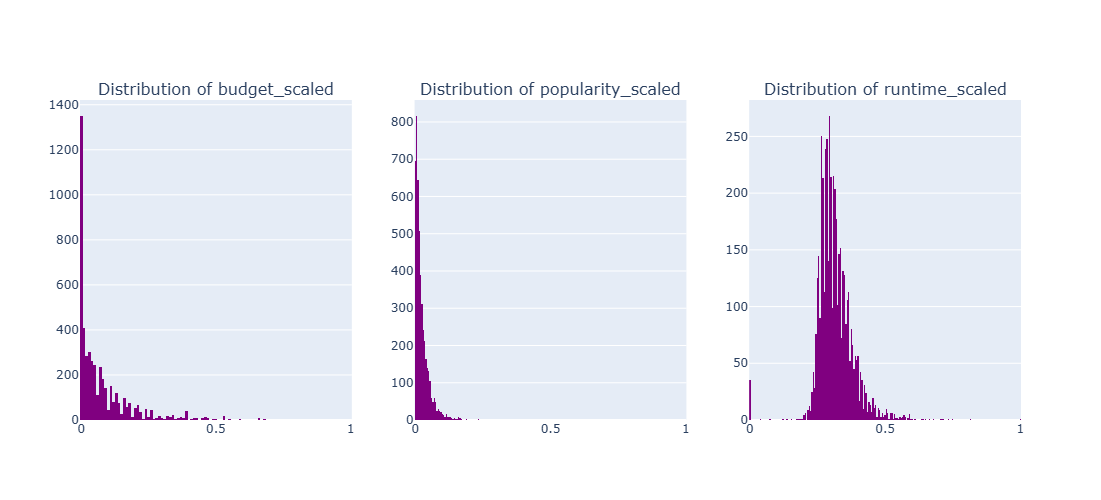

In [34]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

scaled_features = ['budget_scaled', 'popularity_scaled', 'runtime_scaled']

# Create a figure with three subplots
fig = make_subplots(rows=1, cols=len(scaled_features), 
                    subplot_titles=[f'Distribution of {f}' for f in scaled_features])

for i, feature in enumerate(scaled_features, start=1):
    fig.add_trace(
        go.Histogram(
            x=df[feature],
            name=feature,
            marker_color='purple'
        ),
        row=1, col=i
    )

fig.update_layout(height=500, width=1500, showlegend=False)
fig.show()


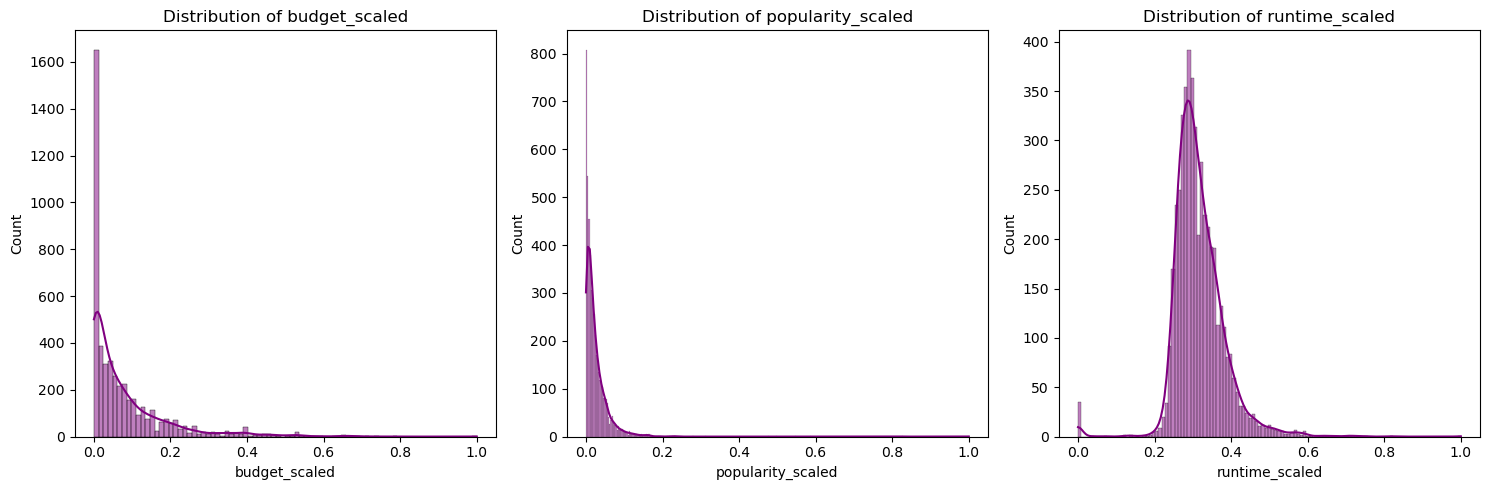

In [32]:
scaled_features = ['budget_scaled', 'popularity_scaled', 'runtime_scaled']

plt.figure(figsize=(15,5))
for i, feature in enumerate(scaled_features, 1):
    plt.subplot(1, 3, i)
    sns.histplot(df[feature], kde=True, color='purple')
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()


# Model Building

1. Selecting Features and Target Variable

In [35]:
# Select features
features = ['budget', 'runtime', 'popularity', 'vote_average', 'vote_count', 'original_language_encoded'] + list(mlb.classes_)
X = df[features]
y = df['revenue']


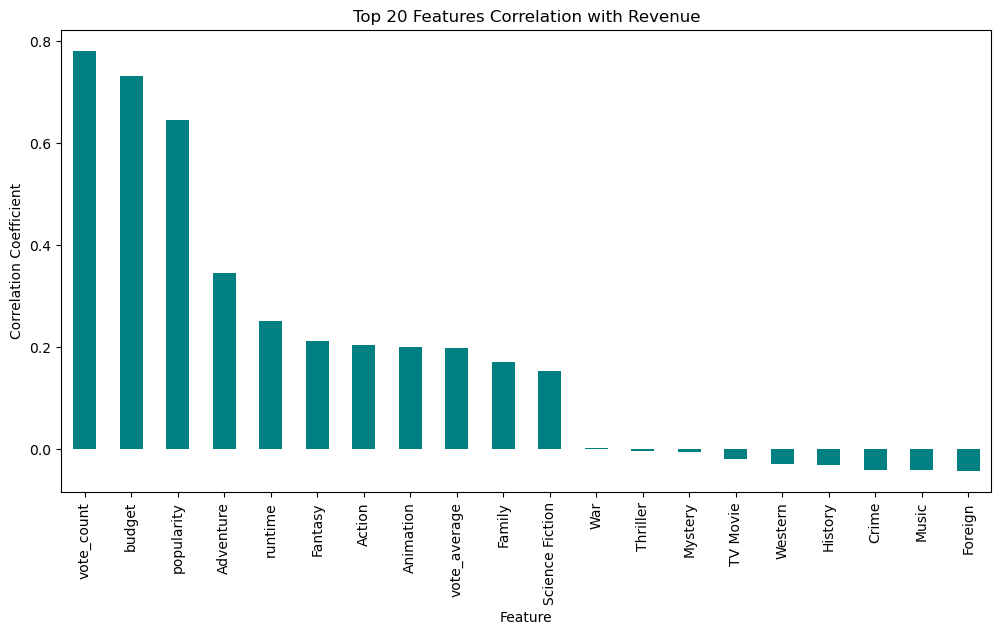

In [37]:
feature_corr = X.corrwith(y).sort_values(ascending=False)

plt.figure(figsize=(12,6))
feature_corr.head(20).plot(kind='bar', color='teal')
plt.title('Top 20 Features Correlation with Revenue')
plt.xlabel('Feature')
plt.ylabel('Correlation Coefficient')
plt.show()


2. Handling missing values in feature

In [22]:
# Check for missing values
print(X.isnull().sum())

# Fill missing values if any
X.fillna(0, inplace=True)


budget                       0
runtime                      0
popularity                   0
vote_average                 0
vote_count                   0
original_language_encoded    0
dtype: int64


3. Splitting the dataset

In [23]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Linear Regression Model

In [42]:
from sklearn.linear_model import LinearRegression

# Initialize and train the model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)


LinearRegression()

<Figure size 1200x600 with 0 Axes>

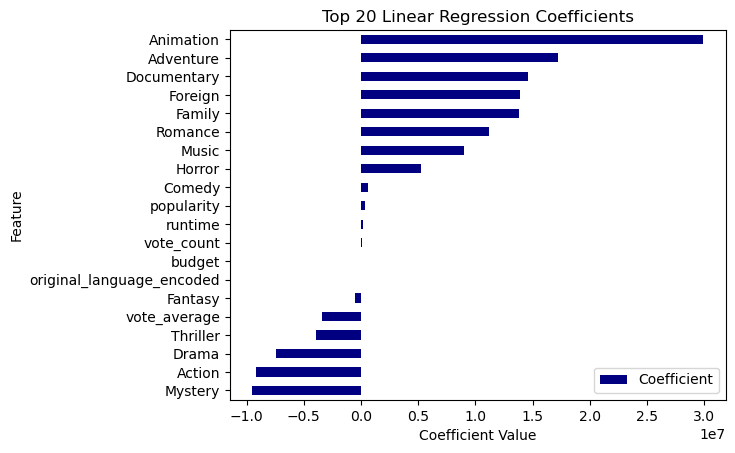

In [43]:
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': lr_model.coef_})
coefficients = coefficients.sort_values(by='Coefficient', ascending=False)

plt.figure(figsize=(12,6))
coefficients.head(20).plot(kind='barh', x='Feature', y='Coefficient', color='navy')
plt.title('Top 20 Linear Regression Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.gca().invert_yaxis()
plt.show()


revenue_class
1    2400
0    2400
Name: count, dtype: int64


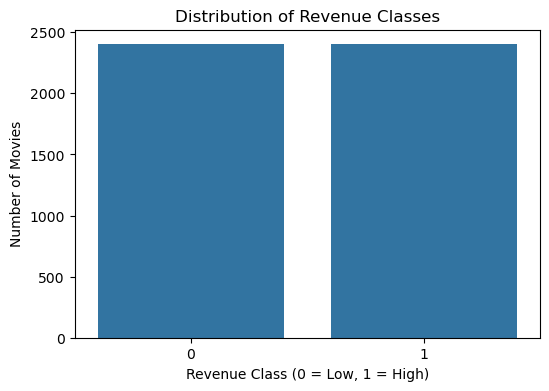

In [24]:
# Calculate the median revenue
median_revenue = df['revenue'].median()

# Create a new column 'revenue_class'
df['revenue_class'] = df['revenue'].apply(lambda x: 1 if x >= median_revenue else 0)

# Visualize the class distribution
class_counts = df['revenue_class'].value_counts()
print(class_counts)

# Plot the class distribution
plt.figure(figsize=(6,4))
sns.countplot(x='revenue_class', data=df)
plt.title('Distribution of Revenue Classes')
plt.xlabel('Revenue Class (0 = Low, 1 = High)')
plt.ylabel('Number of Movies')
plt.show()


In [25]:
# Features and target variable
features = ['budget', 'runtime', 'popularity', 'vote_average', 'vote_count', 
            'original_language_encoded'] + list(mlb.classes_)
X = df[features]
y = df['revenue_class']

# Handle missing values
X.fillna(0, inplace=True)


### Build Classification Model

In [26]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
    X, y, test_size=0.2, random_state=42)


### Logistic Regression Model

In [28]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the model
logreg_model = LogisticRegression(max_iter=1000)
logreg_model.fit(X_train_clf, y_train_clf)

# Predict on test set
y_pred_logreg = logreg_model.predict(X_test_clf)


In [35]:
from sklearn.svm import SVC

# Initialize and train the model
svm_classifier = SVC(kernel='rbf', gamma='scale')
svm_classifier.fit(X_train_clf, y_train_clf)

# Predict on test set
y_pred_svm = svm_classifier.predict(X_test_clf)

# Evaluate the model
cm_svm = confusion_matrix(y_test_clf, y_pred_svm)
print('Confusion Matrix - SVM:\n', cm_svm)
print('Classification Report - SVM:\n', classification_report(y_test_clf, y_pred_svm))
f1_svm = f1_score(y_test_clf, y_pred_svm)
print(f'SVM Classifier F1 Score: {f1_svm}')


Confusion Matrix - SVM:
 [[340 122]
 [ 85 413]]
Classification Report - SVM:
               precision    recall  f1-score   support

           0       0.80      0.74      0.77       462
           1       0.77      0.83      0.80       498

    accuracy                           0.78       960
   macro avg       0.79      0.78      0.78       960
weighted avg       0.79      0.78      0.78       960

SVM Classifier F1 Score: 0.7996127783155856


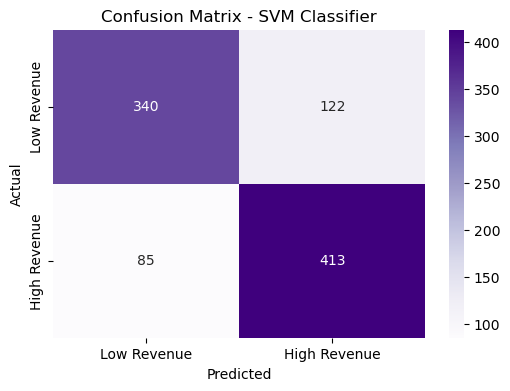

In [36]:
plt.figure(figsize=(6,4))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Purples', 
            xticklabels=['Low Revenue', 'High Revenue'], 
            yticklabels=['Low Revenue', 'High Revenue'])
plt.title('Confusion Matrix - SVM Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


### Model Evaluation

In [33]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score

# Compute confusion matrix
cm_logreg = confusion_matrix(y_test_clf, y_pred_logreg)
print('Confusion Matrix:\n', cm_logreg)

# Classification report
print('Classification Report:\n', classification_report(y_test_clf, y_pred_logreg))

# Calculate F1 score
f1_logreg = f1_score(y_test_clf, y_pred_logreg)
print(f'Logistic Regression F1 Score: {f1_logreg}')


Confusion Matrix:
 [[405  57]
 [ 93 405]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.88      0.84       462
           1       0.88      0.81      0.84       498

    accuracy                           0.84       960
   macro avg       0.84      0.84      0.84       960
weighted avg       0.85      0.84      0.84       960

Logistic Regression F1 Score: 0.84375


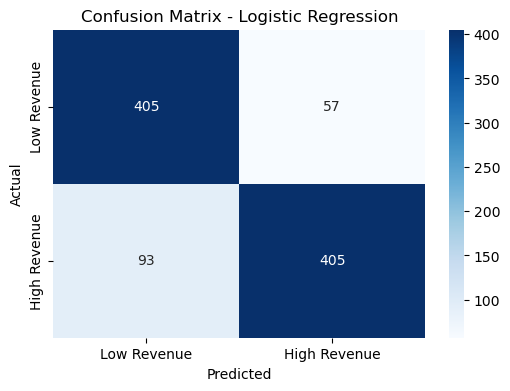

In [34]:
plt.figure(figsize=(6,4))
sns.heatmap(cm_logreg, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Low Revenue', 'High Revenue'], 
            yticklabels=['Low Revenue', 'High Revenue'])
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [31]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the model
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_clf, y_train_clf)

# Predict on test set
y_pred_rf_clf = rf_classifier.predict(X_test_clf)

# Evaluate the model
cm_rf = confusion_matrix(y_test_clf, y_pred_rf_clf)
print('Confusion Matrix - Random Forest:\n', cm_rf)
print('Classification Report - Random Forest:\n', classification_report(y_test_clf, y_pred_rf_clf))
f1_rf = f1_score(y_test_clf, y_pred_rf_clf)
print(f'Random Forest Classifier F1 Score: {f1_rf}')


Confusion Matrix - Random Forest:
 [[398  64]
 [ 76 422]]
Classification Report - Random Forest:
               precision    recall  f1-score   support

           0       0.84      0.86      0.85       462
           1       0.87      0.85      0.86       498

    accuracy                           0.85       960
   macro avg       0.85      0.85      0.85       960
weighted avg       0.85      0.85      0.85       960

Random Forest Classifier F1 Score: 0.8577235772357723


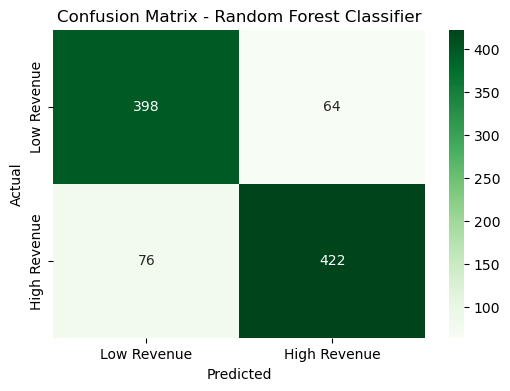

In [32]:
plt.figure(figsize=(6,4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', 
            xticklabels=['Low Revenue', 'High Revenue'], 
            yticklabels=['Low Revenue', 'High Revenue'])
plt.title('Confusion Matrix - Random Forest Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


- Linear Regression

In [44]:
# Predict on test set
y_pred_lr = lr_model.predict(X_test)

# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score

mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f'Linear Regression RMSE: {rmse_lr}')
print(f'Linear Regression R^2 Score: {r2_lr}')


Linear Regression RMSE: 76590504.83668691
Linear Regression R^2 Score: 0.7792955885271154


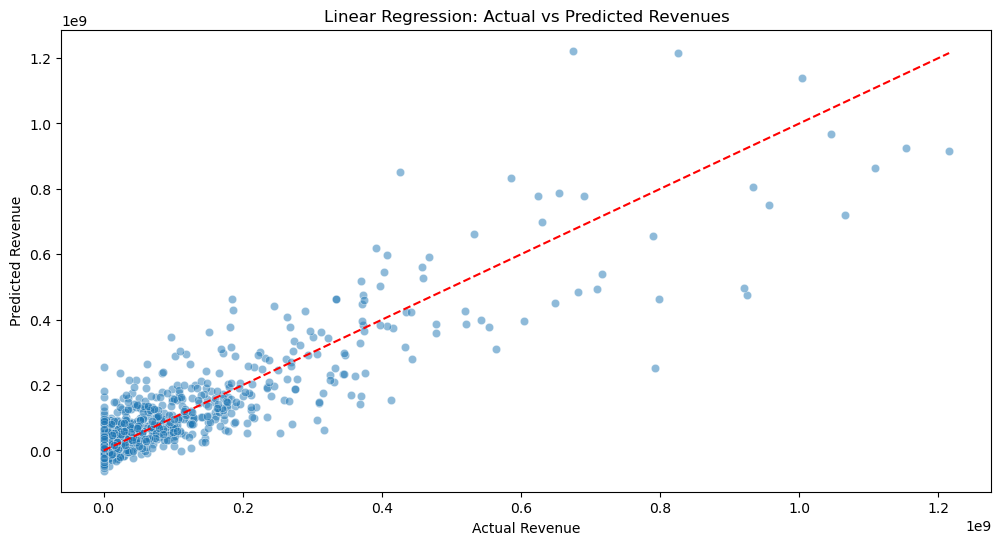

In [45]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=y_test, y=y_pred_lr, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('Linear Regression: Actual vs Predicted Revenues')
plt.xlabel('Actual Revenue')
plt.ylabel('Predicted Revenue')
plt.show()


- Random Forest

In [48]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Random Forest RMSE: {rmse_rf}')
print(f'Random Forest R^2 Score: {r2_rf}')


Random Forest RMSE: 82151583.97139677
Random Forest R^2 Score: 0.7460822665557625


- Actual v/s Predicted Revenues

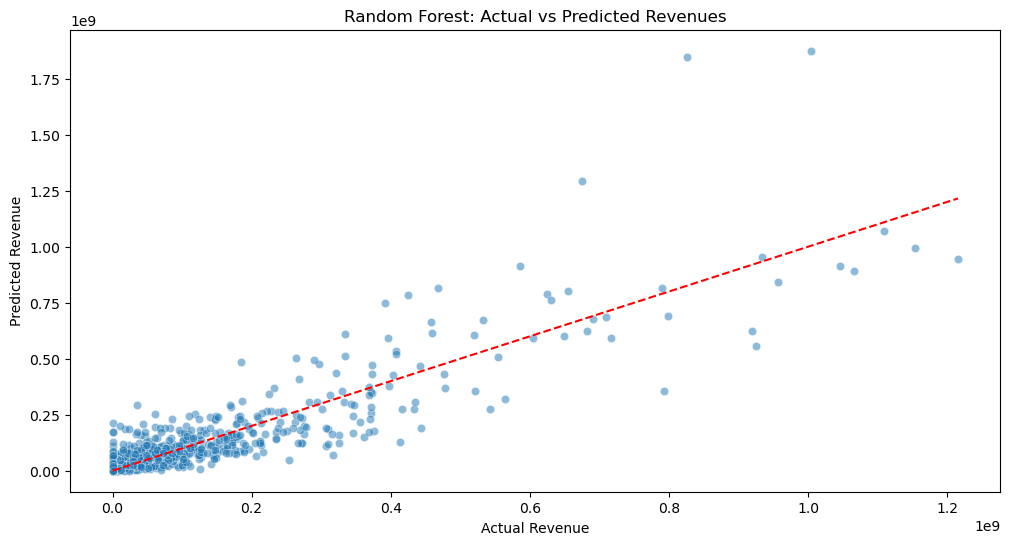

In [50]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=y_test, y=y_pred_rf, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('Random Forest: Actual vs Predicted Revenues')
plt.xlabel('Actual Revenue')
plt.ylabel('Predicted Revenue')
plt.show()

In [37]:
print('Model Comparison:')
print(f'Logistic Regression F1 Score: {f1_logreg:.3f}')
print(f'Random Forest Classifier F1 Score: {f1_rf:.3f}')
print(f'SVM Classifier F1 Score: {f1_svm:.3f}')


Model Comparison:
Logistic Regression F1 Score: 0.844
Random Forest Classifier F1 Score: 0.858
SVM Classifier F1 Score: 0.800


- Feature Importance

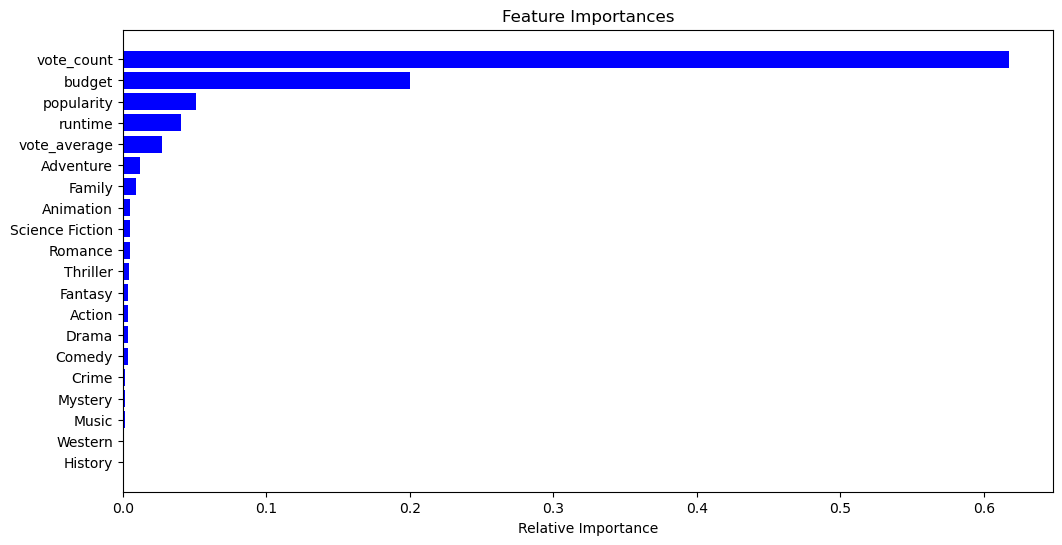

In [51]:
importances = rf_model.feature_importances_
indices = np.argsort(importances)[-20:]  # Top 20 features

plt.figure(figsize=(12,6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()
